In [1]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
##from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Above mentioned the row have min value is 0 but in real that column have some value so we can update mean value

In [4]:
#df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

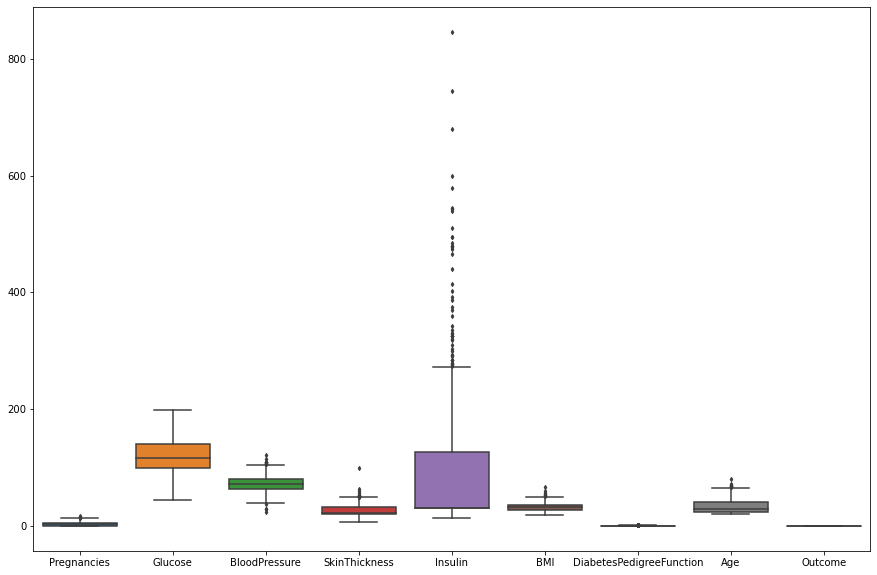

In [6]:
## check the data have outliers or not
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=3)

In [7]:
## Segregate the independent and dependent feature
X=df.iloc[0:,:-1]
y=df.iloc[:,-1]

In [8]:
## Seprate the datset train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
## Standard scaler and scaler pickle file save
import pickle
from sklearn.preprocessing import StandardScaler

In [10]:
def scaledvalue(xtrain,xtest):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(xtrain)
    x_test_scaled=scaler.fit_transform(xtest)
    pickle.dump(scaler,open('Diabetesscaler.pkl','wb'))
    return x_train_scaled,x_test_scaled
    

In [11]:
X_train_scaled,X_test_scaled=scaledvalue(X_train,X_test)

In [12]:
## decision tree hyper parameter tuning
parameters={
    'criterion' : ("gini", "entropy"),
    'splitter' : ("best", "random"),
    'max_depth':[1,2,3,4,5],
    'max_features' : ("auto", "sqrt", "log2")
}

In [13]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [14]:
cv=GridSearchCV(classifier,param_grid=parameters,cv=3,scoring='accuracy',verbose=3)

In [15]:
cv.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.750 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.649 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.651 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.632 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.750 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.649 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=3)

In [16]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [17]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='log2',splitter='best')

In [18]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.7283464566929134

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       168
           1       0.63      0.48      0.54        86

    accuracy                           0.73       254
   macro avg       0.70      0.67      0.67       254
weighted avg       0.72      0.73      0.72       254



In [22]:
confusion_matrix(y_test,y_pred)

array([[144,  24],
       [ 45,  41]], dtype=int64)

In [38]:
accurcay=(144+41)/(144+24+45+41)
accurcay

0.7283464566929134

## SVM

In [23]:
parameter={
    'kernel' : ('linear', 'poly', 'rbf'),
    'C':[0.1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001]
}

In [24]:
Svc_cv=SVC()

In [25]:
gv=GridSearchCV(Svc_cv,param_grid=parameter,cv=3,verbose=3)

In [26]:
gv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.760 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.721 total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.713 total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.696 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.766 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'poly', 'rbf')},
             verbose=3)

In [27]:
gv.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [28]:
svc=SVC(C=10,gamma=0.0001,kernel='rbf')

In [29]:
svc.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.0001)

In [31]:
y_predict=svc.predict(X_test_scaled)

In [32]:
accuracy_score(y_test,y_predict)

0.6692913385826772

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       168
           1       0.63      0.48      0.54        86

    accuracy                           0.73       254
   macro avg       0.70      0.67      0.67       254
weighted avg       0.72      0.73      0.72       254



In [34]:
confusion_matrix(y_test,y_pred)

array([[144,  24],
       [ 45,  41]], dtype=int64)

In [36]:
accuracy=(144+41)/(144+21+45+41)
accuracy

0.7370517928286853

## Naview Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
gnb=GaussianNB()

In [41]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [42]:
y_pred=gnb.predict(X_test_scaled)

In [43]:
confusion_matrix(y_test,y_pred)

array([[137,  31],
       [ 34,  52]], dtype=int64)

In [45]:
accuracy=(137+52)/(137+31+34+52)
accuracy

0.7440944881889764